<a href="https://colab.research.google.com/github/jonatahpfg/Trabalho-ICD/blob/main/Original_de_Projeto_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("rock_spotify.csv", error_bad_lines=False)
dfalbum = pd.read_csv("albumlist.csv", encoding='latin1')
df_music = pd.read_csv("music.csv")


<ipython-input-169-00d676efeb83>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("rock_spotify.csv", error_bad_lines=False)


A seguir será feita uma análise da quantidade de álbums por ano, entre os 500 melhores(segundo a Revista Rolling Stone.

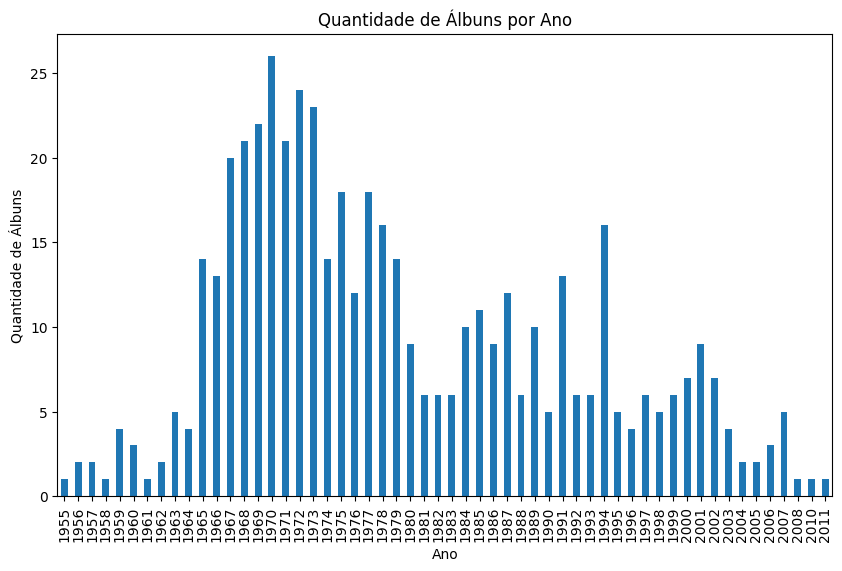

In [170]:
album_por_ano = dfalbum.groupby('Year')['Album'].count()

# Cria o gráfico de barras
album_por_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de Álbuns por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Álbuns')
plt.show()





## **Percebe-se um crescimento anormal a partir de 1965, o que será que pode explicar isso? Faremos uma análise de dois períodos, primeiramente de 1965 a 1980 e depois de 1955 para 1964.**

Rock                            60.350877
Funk / Soul                     10.877193
Rock, Blues                      3.859649
Rock, Pop                        3.157895
Electronic, Rock                 2.807018
Rock, Folk, World, & Country     2.105263
Folk, World, & Country           1.754386
Reggae                           1.754386
Rock, Funk / Soul                1.403509
Blues                            1.052632
Name: Genre, dtype: float64

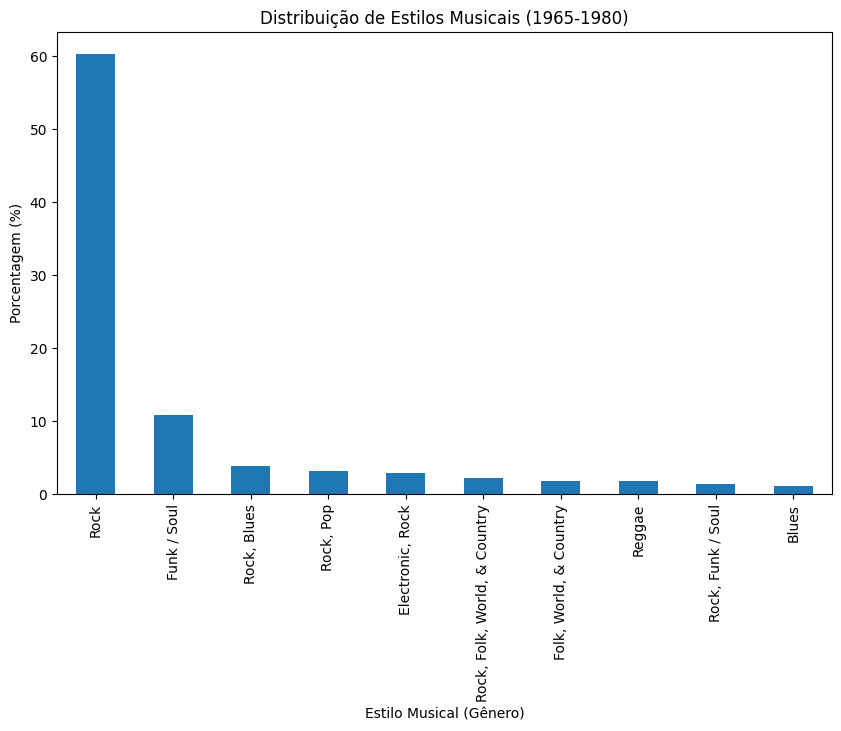

In [171]:
dfalbum_filtro_tempo = dfalbum[(dfalbum['Year'] >= 1965) & (dfalbum['Year'] <= 1980)]
generos_desejados = ['Rock','Jazz', 'Pop', 'Blues', 'Folk']

# Filtra o DataFrame apenas para os gêneros desejados
df_generos_desejados = dfalbum_filtro_tempo[dfalbum_filtro_tempo['Genre'].isin(generos_desejados)]

genero_contagem = dfalbum_filtro_tempo['Genre'].value_counts()

# Calcula a porcentagem de cada estilo musical em relação ao total de ocorrências
total_ocorrencias = genero_contagem.sum()
genero_porcentagem = (genero_contagem / total_ocorrencias) * 100

# Seleciona os 10 estilos musicais mais frequentes
n = 10
genero_porcentagem = genero_porcentagem.head(n)

display(genero_porcentagem)
# Cria o gráfico de barras com as porcentagens
genero_porcentagem.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Estilos Musicais (1965-1980)')
plt.xlabel('Estilo Musical (Gênero)')
plt.ylabel('Porcentagem (%)')
plt.show()

Agora faremos a mesma coisa para o período entre 1955 e 1964 

Jazz                                   20.0
Rock                                   12.0
Jazz, Pop                              12.0
Blues                                  12.0
Rock, Blues                             8.0
Funk / Soul, Blues                      8.0
Rock, Pop                               8.0
Funk / Soul                             4.0
Folk, World, & Country                  4.0
Funk / Soul, Folk, World, & Country     4.0
Name: Genre, dtype: float64

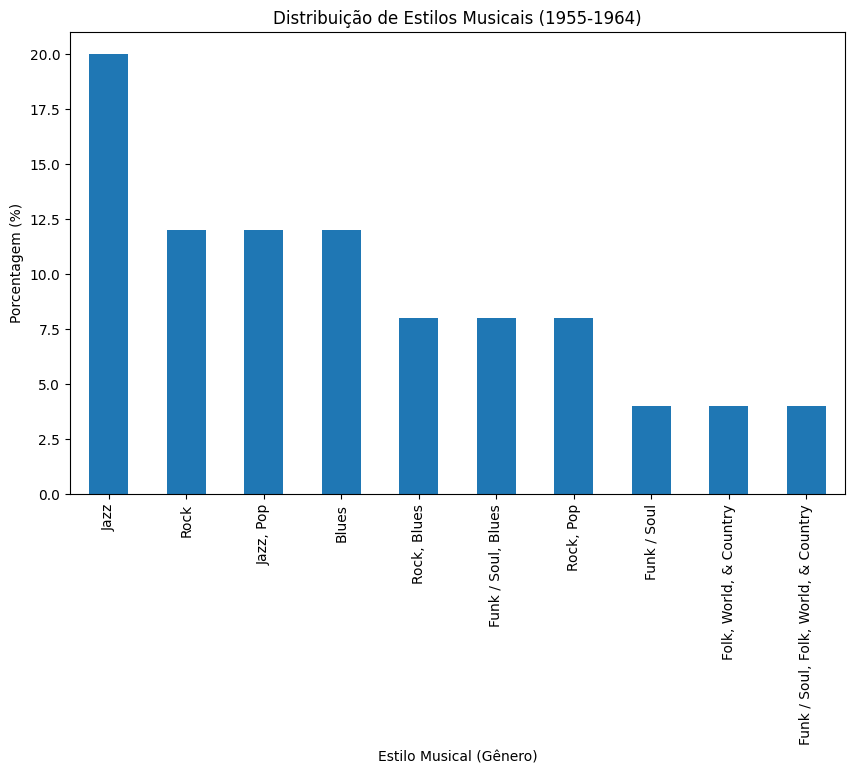

In [172]:
dfalbum_filtro_tempo = dfalbum[(dfalbum['Year'] >= 1955) & (dfalbum['Year'] <= 1964)]
generos_desejados = ['Rock','Jazz', 'Pop', 'Blues', 'Folk']


df_generos_desejados = dfalbum_filtro_tempo[dfalbum_filtro_tempo['Genre'].isin(generos_desejados)]

genero_contagem = dfalbum_filtro_tempo['Genre'].value_counts()


total_ocorrencias = genero_contagem.sum()
genero_porcentagem = (genero_contagem / total_ocorrencias) * 100


n = 10
genero_porcentagem = genero_porcentagem.head(n)

display(genero_porcentagem)

genero_porcentagem.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Estilos Musicais (1955-1964)')
plt.xlabel('Estilo Musical (Gênero)')
plt.ylabel('Porcentagem (%)')
plt.show()

A década de 70 e 80 foram períodos em que a indústria fonográfica estava em
pleno desenvolvimento, com o lançamento de muitos álbuns icônicos e a consolidação de várias gravadoras e selos musicais. Essas décadas também foram marcadas por eventos culturais e sociais significativos, como o movimento pelos direitos civis e a revolução tecnológica, que influenciaram a música e a produção de discos. Portanto, a presença de muitos discos das décadas de 70 e 80 na lista dos 500 melhores discos da Rolling Stone pode ser atribuída a uma combinação de fatores históricos, culturais e musicais que tornaram essas décadas particularmente ricas em termos de produção musical e influência cultural. Ou seja, torna-se evidente através dos gráficos que os discos deram um "Boom" próximo dos anos 70, com o surgimento de vários gêneros e estilos musicais que tiveram um impacto duradouro na indústria musical e na cultura popular, ademais é vísivel que o rock tornou-se líder do mainstream da época,esse aumento na popularidade pode ter levado a uma redução relativa da atenção a outros estilos em critérios de avaliação dos críticos.

### **Agora vamos fazer uma análise referente a proporcionalidade entre a quantidade de discos de cada artista entre os 500 melhores e a popularidade de algumas de suas músicas**

Então vamos ver a média de popularidade dos artistas com álbuns entre os 500 melhores no dataset com músicas gerais, limitando para aqueles que possuem pelo menos 5 músicas no arquivo.

In [173]:
artistas_discos = dfalbum['Artist'].unique()

df_musicas_artistas_presentes = df[df['artist'].isin(artistas_discos)]

contagem_musicas_por_artista = df_musicas_artistas_presentes.groupby('artist').size()

# Filtrar apenas os artistas que possuam pelo menos 5 músicas
artistas_com_minimo_musicas = contagem_musicas_por_artista[contagem_musicas_por_artista >= 5 ]

# Filtrar o dataset de músicas para incluir somente os artistas com pelo menos 5 músicas
df_musicas_artistas_presentes_filtrado = df_musicas_artistas_presentes[df_musicas_artistas_presentes['artist'].isin(artistas_com_minimo_musicas.index)]

# Calcular a média de popularidade de cada artista
media_popularidade_por_artista = df_musicas_artistas_presentes_filtrado.groupby('artist')['popularity'].mean()

# Ordenar a média de popularidade por artista em ordem decrescente
media_popularidade_por_artista = media_popularidade_por_artista.sort_values(ascending=False)


media_geral_entre500= media_popularidade_por_artista.mean()


print(f"\nA média de popularidade de artistas com álbuns entre os 500 melhores é {media_geral_entre500}%")



A média de popularidade de artistas com álbuns entre os 500 melhores é 53.44971120667604%


Com essa váriavel mediamedia_sem_entre500 = df_unido[df_unido['Album'] == 0].mean(), obtemos que a popularidade geral dos artistas sem álbuns entre os 500 é 50,7%(sem limitações impostas a esse dado), já os que possuem ao menos um álbum (com limitações de pelo menos 5 músicas no dataset) tem média de popularidade de 53%.

Agora vamos categorizar quantos álbuns cada artista possui no dataset, gerando um gráfico.

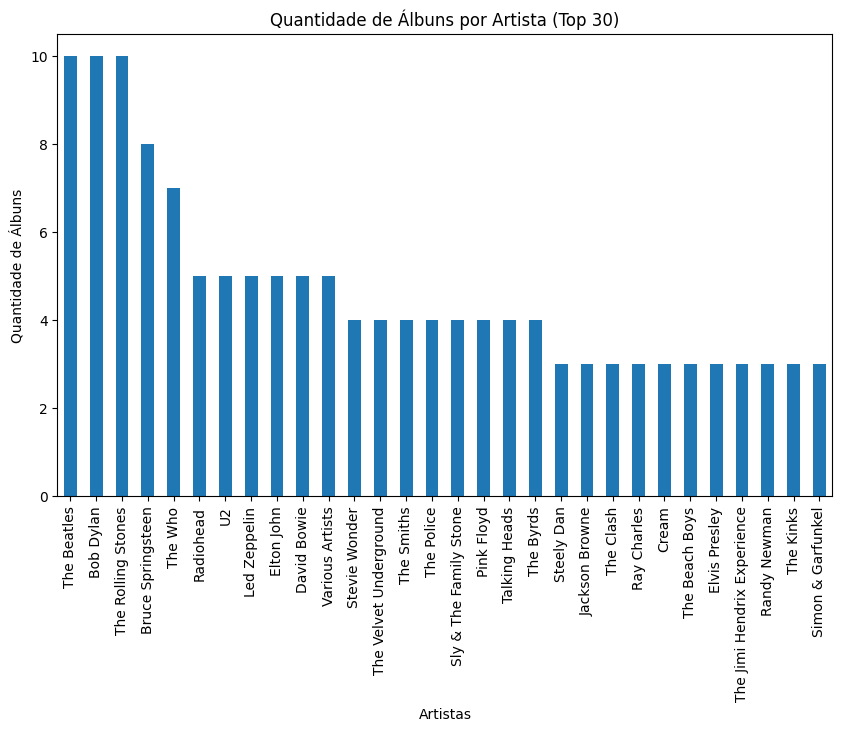

In [174]:
#Neste pedaço basicamento separamos a quantidade de álbum
df_album_por_artista = dfalbum.groupby('Artist')['Album'].count()
df_album_por_artista = df_album_por_artista.sort_values(ascending=False)
n_artistas = 30 
album_por_artista_limitado = df_album_por_artista.head(n_artistas)

album_por_artista_limitado.plot(kind='bar', figsize=(10, 6))
plt.title(f'Quantidade de Álbuns por Artista (Top {n_artistas})')
plt.xlabel('Artistas')
plt.ylabel('Quantidade de Álbuns')
plt.show()



Com essas informações vamos verificar se a quantidade de álbuns entre os 500 melhores é proporcional a popularidade


In [175]:
#calcular a média da popularidade agrupada pelos artistas
df_popularidade_media = df.groupby('artist')['popularity'].mean().sort_values(ascending=False)


artistas_com_mais_de_5_musicas = df['artist'].value_counts()[df['artist'].value_counts() > 5].index

#filtrar a popularidade para somente artistas com pelo menos 6 músicas no dataset
df_popularidade_media_filtrada = df_popularidade_media[df_popularidade_media.index.isin(artistas_com_mais_de_5_musicas)]

#filtrar os artistas com mais de 10% de popularidade
df_popularidade_media_filtrada = df_popularidade_media_filtrada[df_popularidade_media_filtrada >10]
#dataframe categorizado 
df_unido = pd.DataFrame({'Artist': df_popularidade_media_filtrada.index, 'popularity': df_popularidade_media_filtrada.values})

#adição dos albuns ao lado dos artistas que estão no top 500
df_unido = df_unido.merge(df_album_por_artista, on='Artist', how='left')




df_unido['Album']= df_unido['Album'].fillna(0)
print("\nUnião da média de popularidade com a quantidade de álbuns por artista:")
display(df_unido)


União da média de popularidade com a quantidade de álbuns por artista:


,Artist,popularity,Album
0,My Chemical Romance,71.833333,0.0
1,System Of A Down,70.875000,0.0
2,Bob Marley & The Wailers,69.625000,3.0
3,Linkin Park,69.235294,0.0
4,Coldplay,67.529412,1.0
...,...,...,...
217,the feelers,24.900000,0.0
218,Jimmy Barnes,24.833333,0.0
219,Black Rebel Motorcycle Club,23.666667,0.0
220,Super Furry Animals,22.166667,0.0


In [176]:
count = (df_unido['Album'] > 0).sum()
total_linhas = df_unido['Album'].count()
procentagem_presença= int(count/total_linhas*100)
print(f"{count} de {total_linhas} artistas que estão entre os mais populares do datset possuem pelo um álbum entre os 500 melhores. Representando {procentagem_presença}% do total")




94 de 222 artistas que estão entre os mais populares do datset possuem pelo um álbum entre os 500 melhores. Representando 42% do total


Lembrando que limitamos algumas informações, deixamos somente os artistas que possuem  pelo menos 6 músicas no dataset do spotify, isso para manter uma análise mais sólida da popularidade dos artistas, ademais limitamos também para popularidade superior a 10%.

Podemos questionar com os dados obtidos se a popularidade dos artistas é um indicador confiável da qualidade de sua música, uma vez que nem todos os artistas populares necessariamente têm álbuns entre os 500 melhores. Isso pode abrir discussões sobre como a qualidade musical é avaliada e reconhecida na indústria da música e na sociedade em geral. Porém, é perceptível que 41% é um número altamente expressivo, provando que de fato eles estão em uma alta prateleira da indústria musical. Além disso, é preciso avaliar que muitas das bandas que possuem álbuns entre os 500 podem não ser tão populares em aplicativos de streaming mas possuírem uma imagem de prestígio no cenário, isso porque alguma delas não possuem estilos tão atuais,com isso, verificaremos essa questão com gráficos de popularidade dos períodos de 1955 a 1964 e 1965 a 1980.  


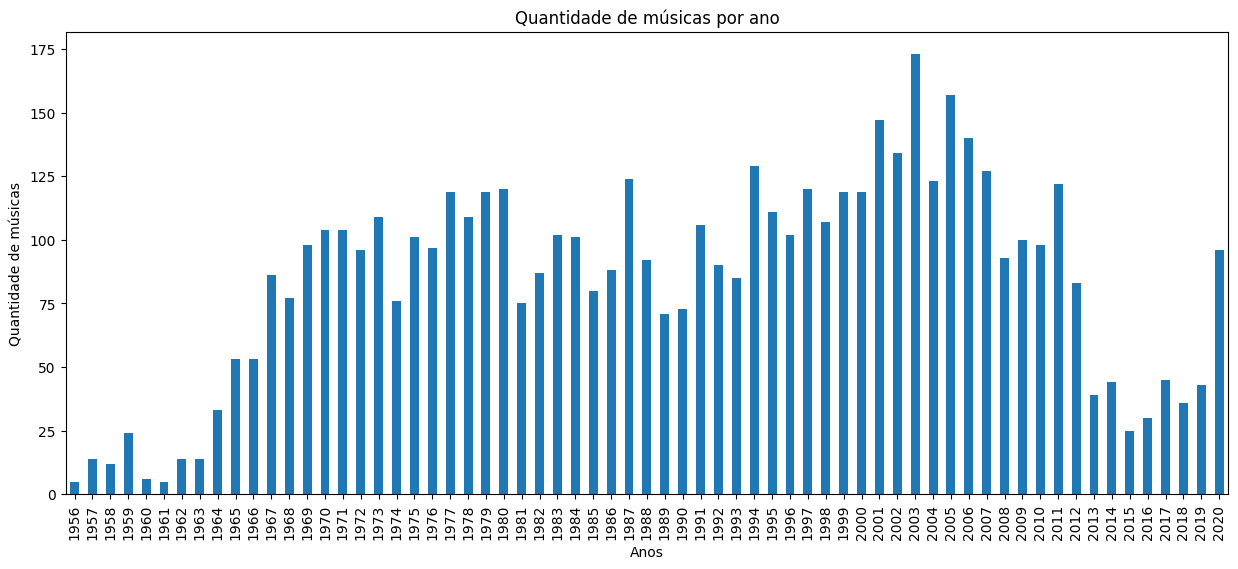

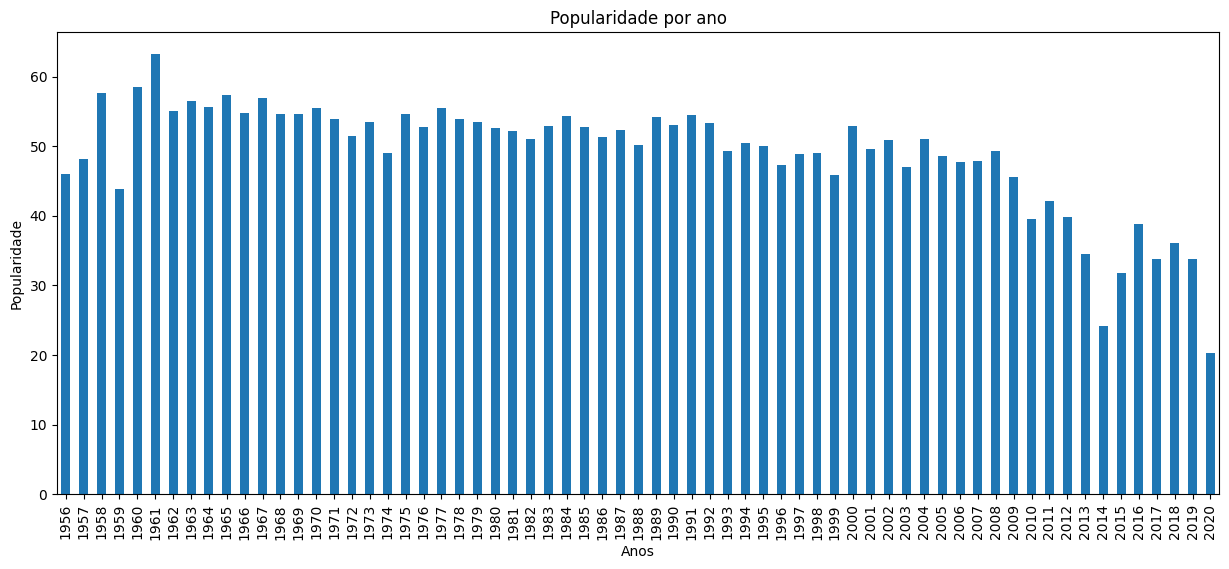

In [177]:
df_filtro_tempo = df[(df['release_date'] >= 1965) & (df['release_date'] <= 1980)]
df_popularidade_80_ano = df_filtro_tempo.groupby('release_date')['popularity'].mean()
df_popularidade_80= df_popularidade_80_ano.mean()

df_filtro_tempo_55 = df[(df['release_date'] >= 1955) & (df['release_date'] <= 1964)]
df_popularidade_55_ano = df_filtro_tempo_55.groupby('release_date')['popularity'].mean()
df_popularidade_55=df_popularidade_55_ano.mean()

coluna_ano = df['release_date']
contagem_por_ano = coluna_ano.value_counts().sort_index()

coluna_popularidade = df.groupby('release_date')['popularity'].mean()


contagem_por_ano.plot(kind='bar', figsize=(15, 6))
plt.title('Quantidade de músicas por ano')
plt.xlabel('Anos')
plt.ylabel('Quantidade de músicas')
plt.show()

coluna_popularidade.plot(kind='bar', figsize=(15, 6))
plt.title('Popularidade por ano')
plt.xlabel('Anos')
plt.ylabel('Popularidade')
plt.show()


musicas_55 = df[(df['release_date'] >= 1955) & (df['release_date'] <= 1964)]

total_musicas_no_intervalo = musicas_55.shape[0]

musicas_80 = df[(df['release_date'] >= 1965) & (df['release_date'] <= 1980)]

total_musicas_no_intervalo_80= musicas_80.shape[0]



In [178]:
print(f'O número total de músicas no intervalo de anos 1955 a 1964 é: {total_musicas_no_intervalo}')
print(f'O número total de músicas no intervalo de anos 1965 a 1980 é: {total_musicas_no_intervalo_80}')
print(f"Popularidades respectivas : {df_popularidade_55}% e {df_popularidade_80}%")

O número total de músicas no intervalo de anos 1955 a 1964 é: 127
O número total de músicas no intervalo de anos 1965 a 1980 é: 1521
Popularidades respectivas : 53.85152717652718% e 54.0142939548881%


Podemos perceber que as porcentagens de popularidade estão parecidas, porém percebemos que o número de músicas nos intervalos variam muito, assim, percebemos que em um espaço de tempo maior e com mais músicas o período de 65 a 80 possui uma constância maior, demonstrando de fato a revolução musical do momento. Dessa forma, caso a época 1955 a 1964 possuísse um número de músicas equivalente ao de 65 a 80, provavelmente teria uma média menor. Ademais, muitos estilos da década de 50 e 60 tornaram-se nichados em termos de popularidade e reconhecimento em diferentes períodos históricos e em diferentes contextos culturais.

### **Portanto, vamos analisar como os estilos sofreram (crescimento/descrescimento) na popularidade ao passar dos anos, para assim entender como os gêneros possuem maior aceitação.**

Fizemos a interseção de dois datasets musicais, para podermos ter gênero e popularidade tabelados pelas músicas.

In [195]:

#vamos deixar ambos datasets com letras minúsculas 
df_minusculo = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_music_minusculo = df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


df_renomeado = df_minusculo[['name', 'artist', 'popularity']]
df_renomeado = df_renomeado.rename(columns={'name': 'track_name', 'artist': 'artist_name'})

# Combina os dois dataframes e mantém todas as colunas do df_music
resultado = pd.merge(df_renomeado, df_music, on=['track_name', 'artist_name'], how='inner')



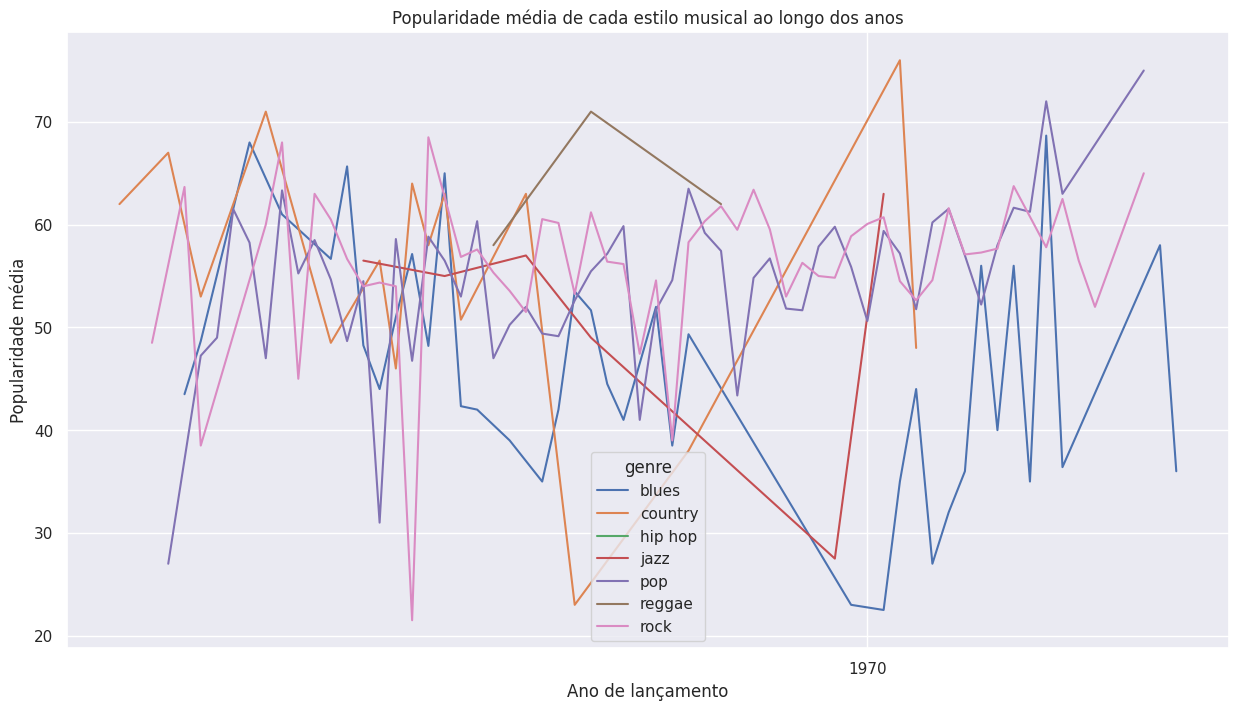

In [221]:
popularidade_estilos = resultado.groupby(['genre', 'release_date'])['popularity'].mean().reset_index()

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=popularidade_estilos, x='release_date', y='popularity', hue='genre', ax=ax)
ax.set_xlabel('Ano de lançamento')
ax.set_ylabel('Popularidade média')
ax.set_title('Popularidade média de cada estilo musical ao longo dos anos')
plt.show()